# **4. Lattice graphics**

Lattice plots provide a way to visually represent data where the layout on the page reflects important aspects of the data's structure. They offer similar capabilities to the S-PLUS trellis library. The lattice package builds on top of the grid package. To utilize lattice graphics, both packages need to be installed. If lattice is installed, the grid package will be loaded automatically. The older coplot() function in the base package shares some capabilities with xyplot(), but it's limited to handling only two conditioning factors or variables at a time.

## **4.1 Examples that Present Panels of Scatterplots – Using xyplot()**

- The main function for creating scatterplot panels is called xyplot().
- We'll use the dataset "tinting" to demonstrate xyplot(), which explores the effects of car window tinting on visual performance.
- The dataset includes variables like csoa (time to recognize a target), it (inspection time), and age.
- Factors like tint (level of tinting) and target (contrast) are also included, along with sex and age group.
- The dataset aims to understand visual recognition tasks through car windows.
- Figure 14 depicts the type of graph produced by xyplot(), with different symbols representing different contrasts.



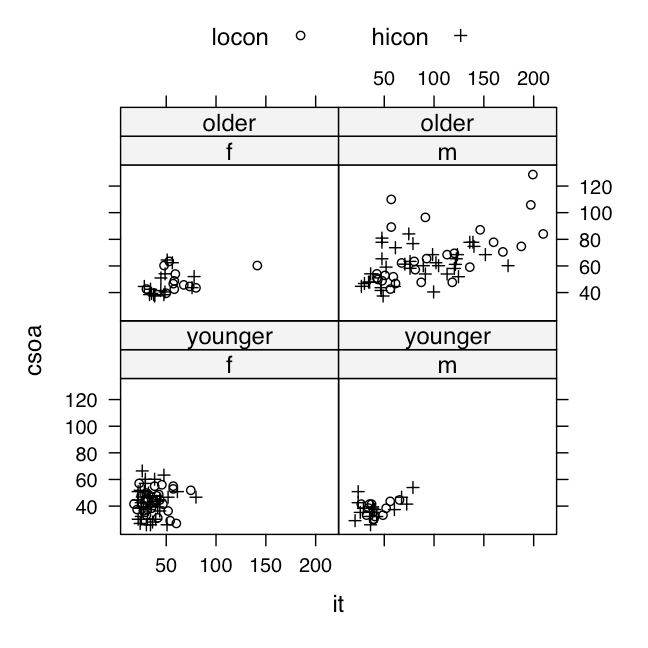



**Figure 14: csoa versus it, for each combination of females/males and elderly/young.
The two targets (low, + = high contrast) are shown with different symbols**

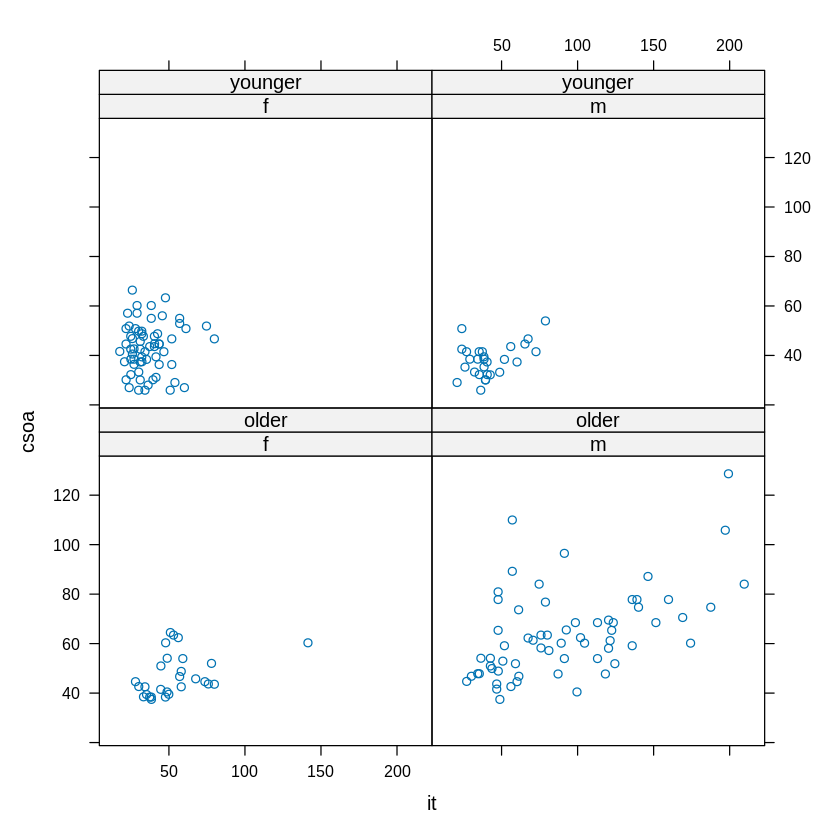

In [9]:
library(lattice)
tinting <- read.csv("/content/tinting.csv")
xyplot(csoa ~ it | sex * agegp, data = tinting) # Simple use of xyplot()


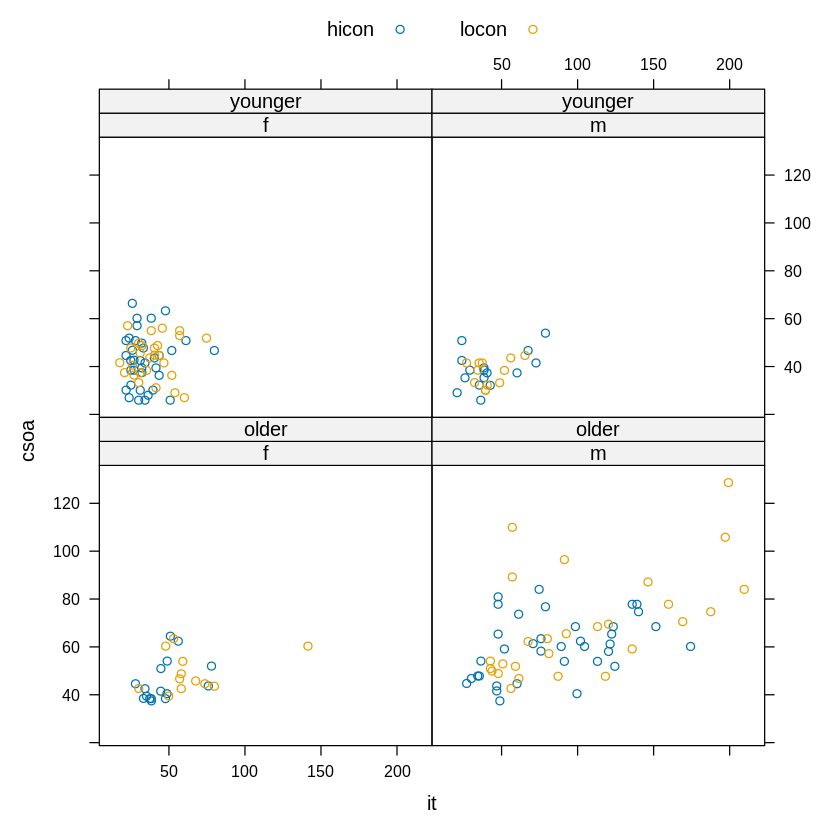

In [10]:
#The two diffrent symbols distinguish between low contrast and high contrast targets.
xyplot(csoa~it|sex*agegp, data=tinting,
 groups=target, auto.key=list(columns=2))

A notable observation is that exceptionally high values for both csoa and it are only observed among elderly males. It's clear that the extended response times for some elderly males are associated, as anticipated, with the low-contrast target. To illustrate this relationship, smooth curves are separately fitted to the data for the two target types.

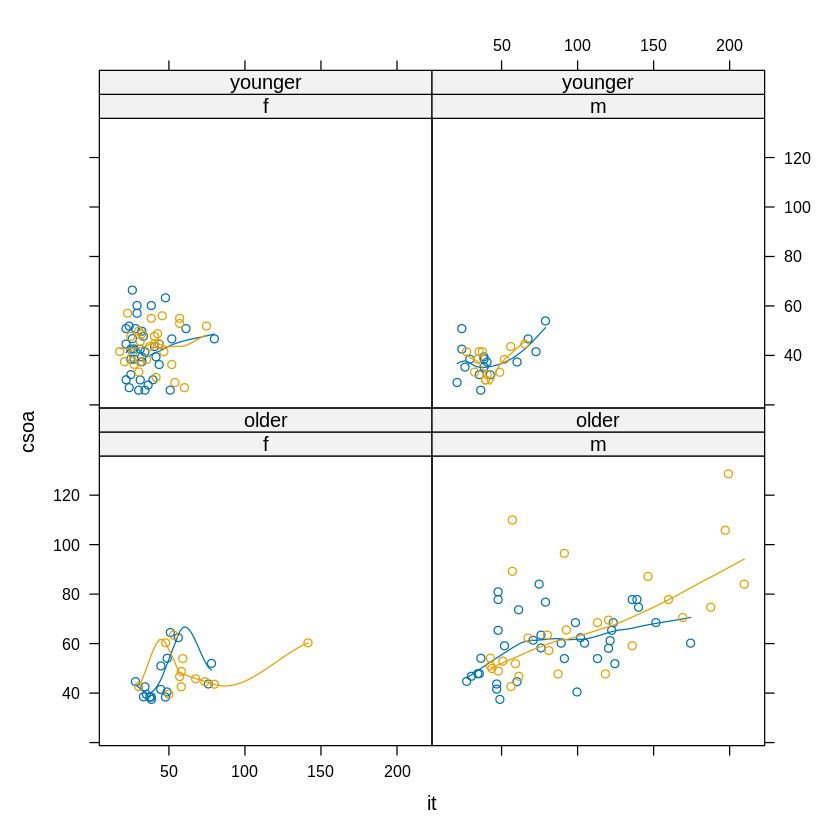

In [11]:
xyplot(csoa ~ it | sex * agegp, data = tinting, panel = panel.superpose,
       groups = target, type = c("p", "smooth"))

The association between csoa and it appears to be consistent across both contrast levels. In the end, a plot (Figure 15) is created using various symbols (in black and white) to represent different levels of tinting. The highest response times are observed for the high level of tinting.

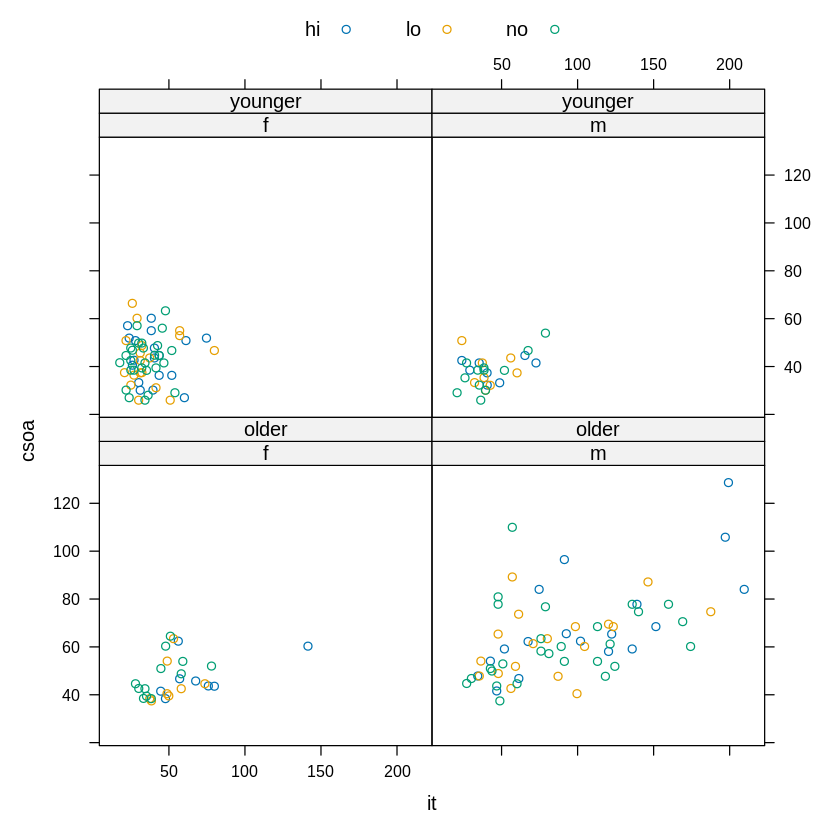

In [12]:
xyplot(csoa~it|sex*agegp, data=tinting, groups=tint,
 auto.key=list(columns=3))

## **4.2 Some further examples of lattice plots**

These are given with a minimum of explanation.



**4.2.1 Plotting columns in parallel**

Use the parameter outer to control whether the columns appear on the same or separate panels. If on
the same panel, it is desirable to use auto.key to give a simple key. The following use the dataset
grog from the DAAGxtras package:

rownames,Beer,Wine,Spirit,Country,Year
<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,5.240000,2.860000,1.810000,Australia,1998
2,5.150000,2.870000,1.770000,Australia,1999
3,5.060000,2.940000,1.880000,Australia,2000
4,5.070000,2.950000,2.070000,Australia,2001
5,4.800000,2.910000,1.810000,Australia,2002
6,4.970000,3.010000,1.860000,Australia,2003
7,4.680000,3.070000,2.060000,Australia,2004
8,4.580000,3.130000,2.120000,Australia,2005
9,4.570000,3.110000,2.150000,Australia,2006


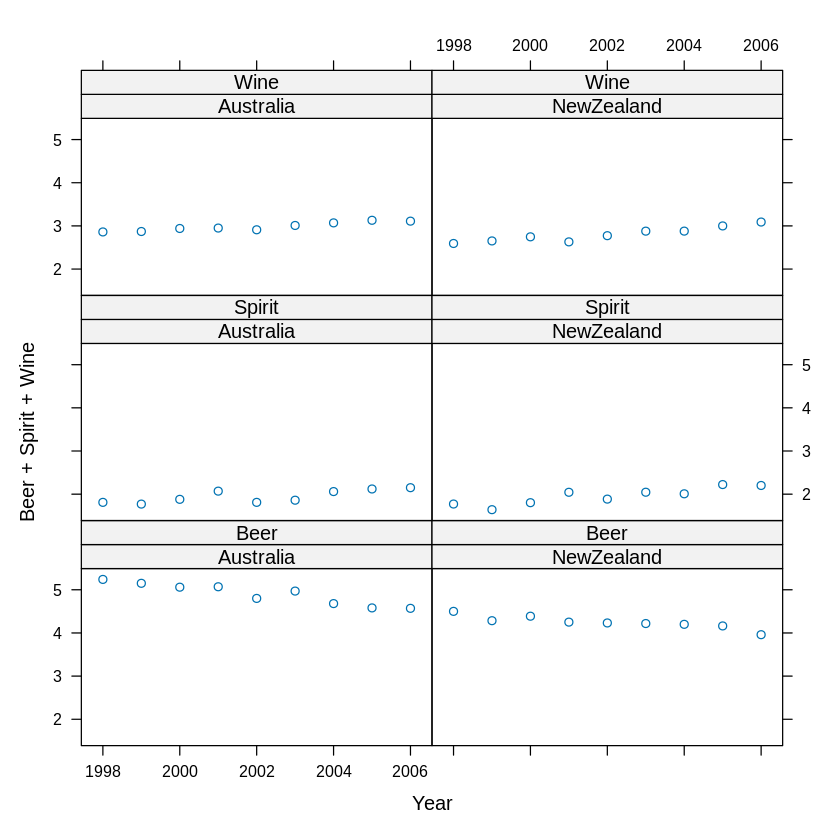

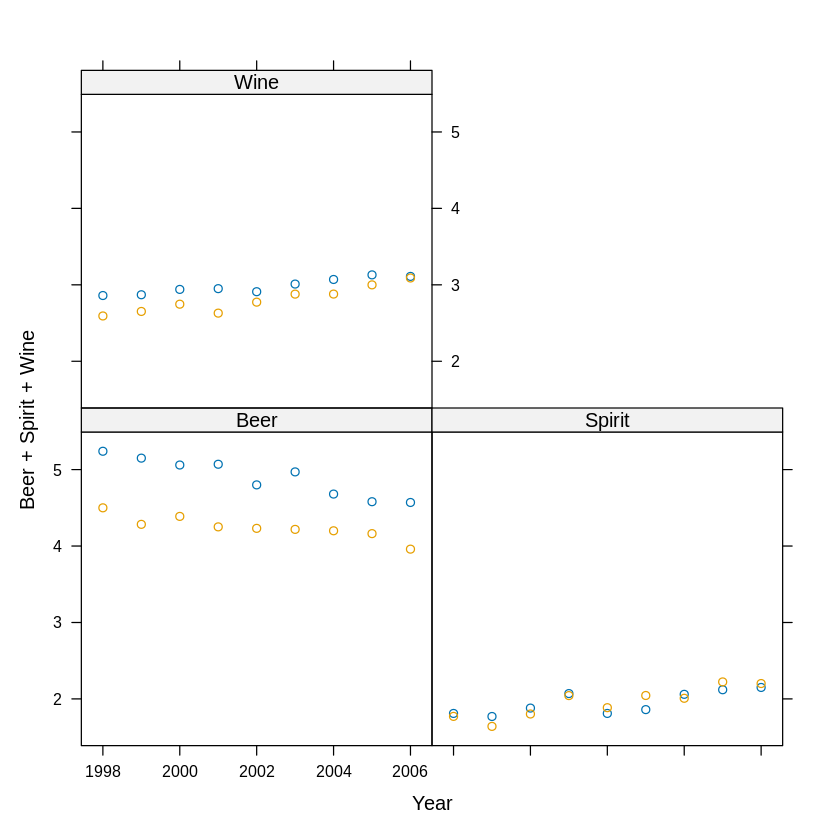

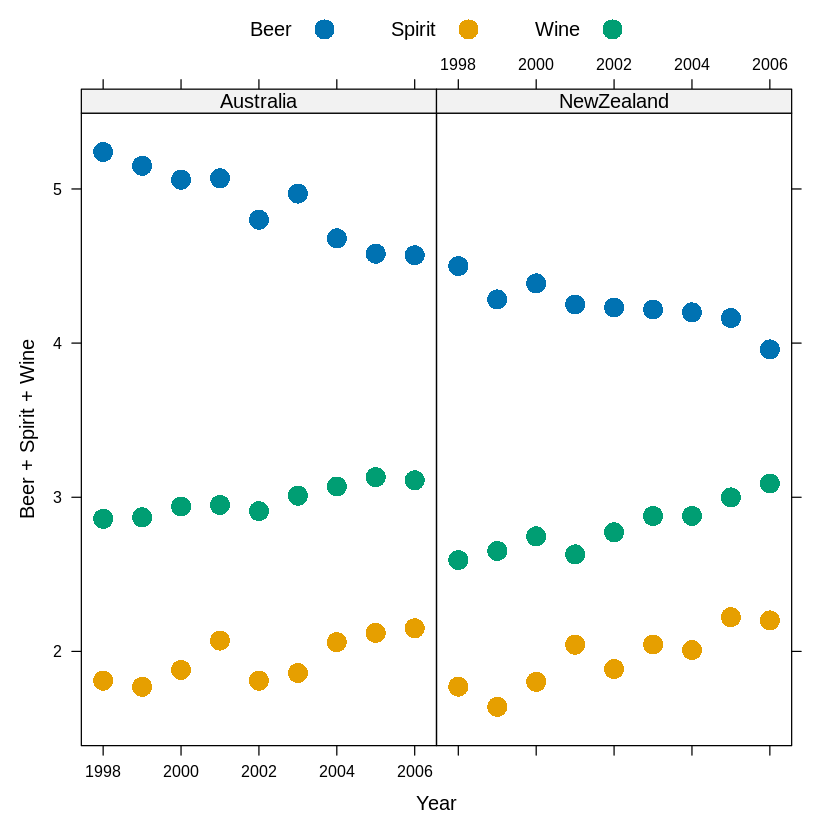

In [14]:
grog <- read.csv("/content/grog.csv")
grog
xyplot(Beer + Spirit + Wine ~ Year | Country, outer = TRUE, data = grog)
xyplot(Beer + Spirit + Wine ~ Year, groups = Country, outer = TRUE, data = grog)
xyplot(Beer + Spirit + Wine ~ Year | Country, outer = FALSE, data = grog, auto.key = list(columns = 3),
       par.settings = simpleTheme(pch = 16, cex = 2))


In the final plot, note the use of simpleTheme() as a simple mechanism for controlling common
parameter settings. Use of the parameter par.settings makes the change for the current plot only.
Use trellis.par.set() to make the changes for the duration of the current device, unless reset.


**4.2.2 Fixed, sliced and free scales**

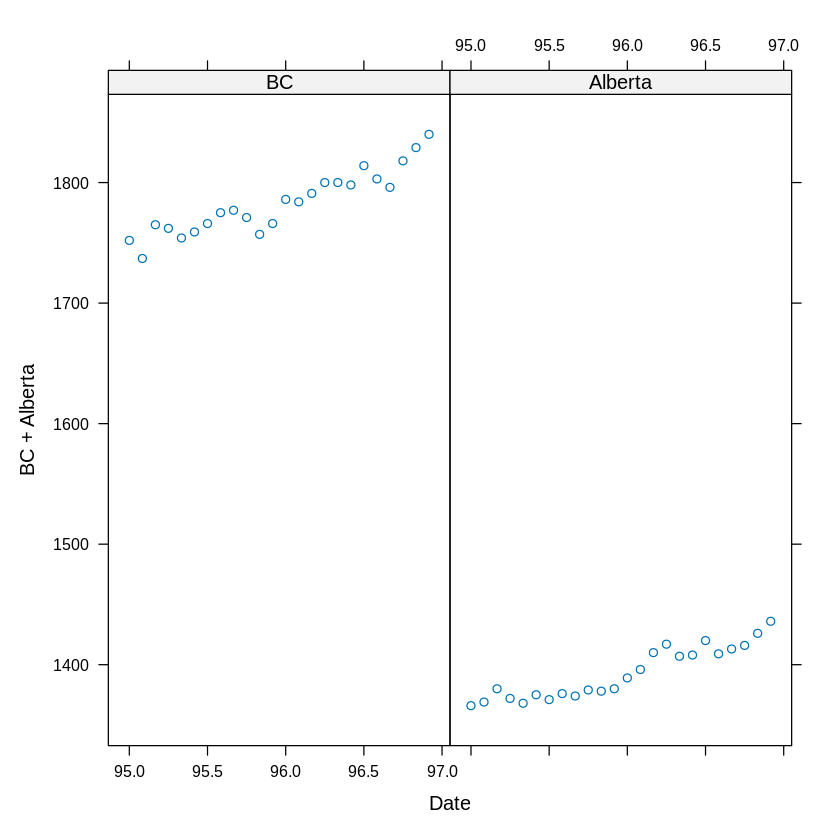

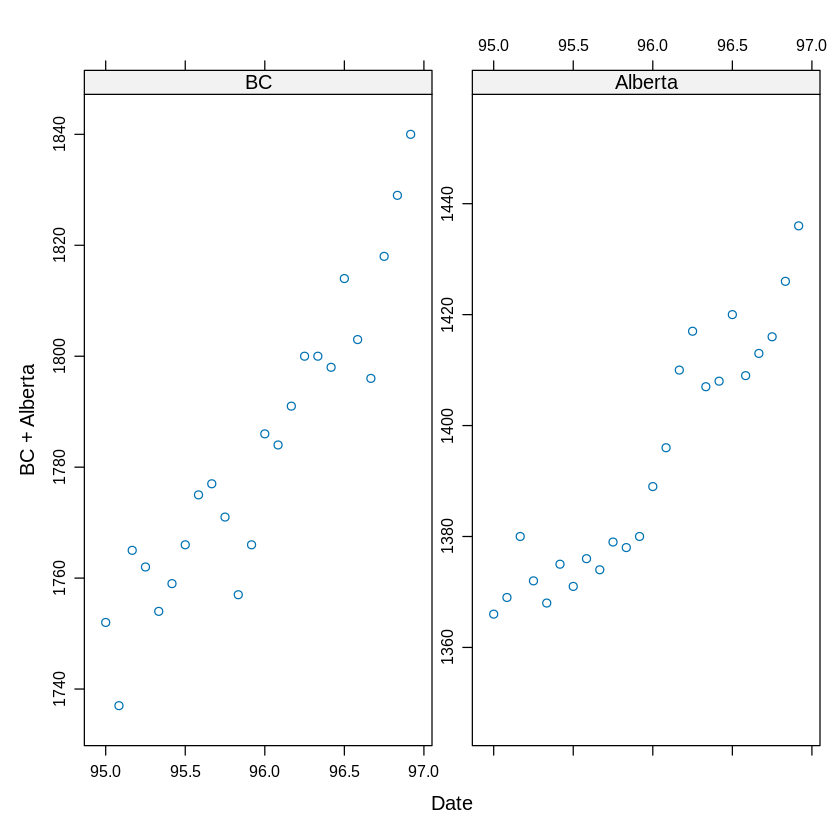

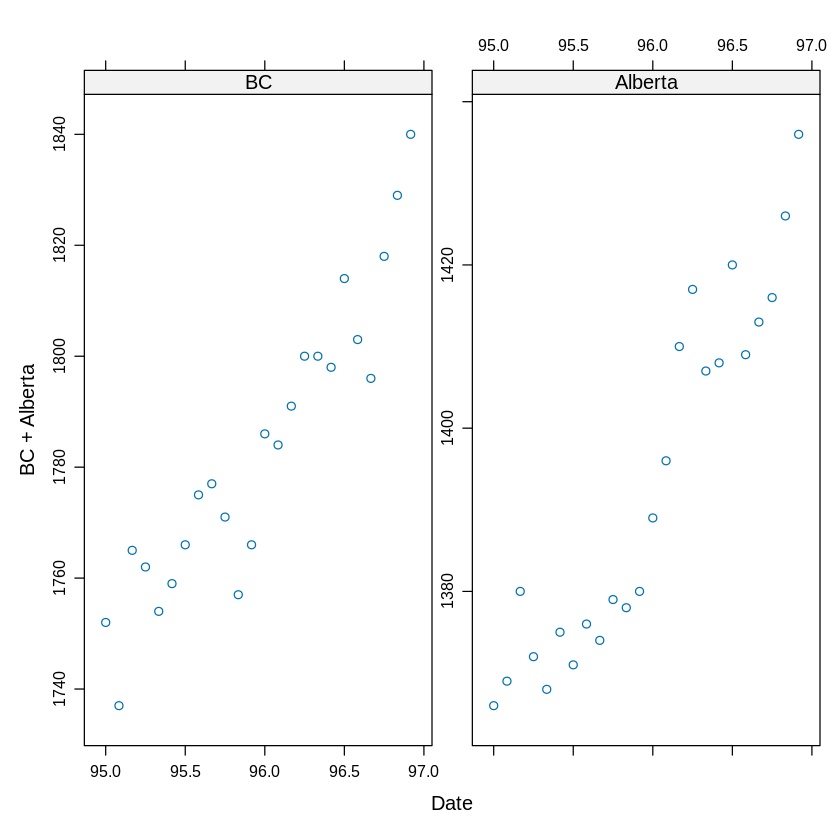

In [16]:
#library(DAAG)
## scale="fixed"
jobs <- read.csv("/content/jobs.csv")
xyplot(BC+Alberta ~ Date, data=jobs, outer=TRUE)
## scale="sliced" - different slices of same scale
xyplot(BC+Alberta ~ Date, data=jobs, outer=TRUE,
 scales=list(y=list(relation="sliced")) )
## scale="free" - independent scales
xyplot(BC+Alberta ~ Date, data=jobs, outer=TRUE,
 scales=list(y=list(relation="free")) )

## **4.3 An incomplete list of lattice Functions**


**splom( ~ data.frame) # Scatterplot matrix
bwplot(factor ~ numeric , . .) # Box and whisker plot
qqnorm(numeric , . .) # normal probability plots
dotplot(factor ~ numeric , . .) # 1-dim. Display
stripplot(factor ~ numeric , . .) # 1-dim. Display
barchart(character ~ numeric , . .)
histogram( ~ numeric , . .)
densityplot( ~ numeric , . .) # Smoothed version of histogram
qqmath(numeric ~ numeric , . .) # QQ plot
splom( ~ dataframe, . .) # Scatterplot matrix
parallel( ~ dataframe, . .) # Parallel coordinate plots
cloud(numeric ~ numeric * numeric, . .) # 3-D plot
contourplot(numeric ~ numeric * numeric, . .) # Contour plot
levelplot(numeric ~ numeric * numeric, . .) # Variation on a contour plot**


In each instance, conditioning variables can be added. In most cases, a groups parameter can be specified, i.e.,
the plot is repeated for the groupings within the one panel.

## **4.4 Exercises**

1. The following data gives milk volume (g/day) for smoking and nonsmoking mothers25:
 Smoking Mothers: 621, 793, 593, 545, 753, 655, 895, 767, 714, 598, 693
 Nonsmoking Mothers: 947, 945, 1086, 1202, 973, 981, 930, 745, 903, 899, 961
Present the data (i) in side by side boxplots (use bwplot()); (ii) using a dotplot form of display (use
dotplot())



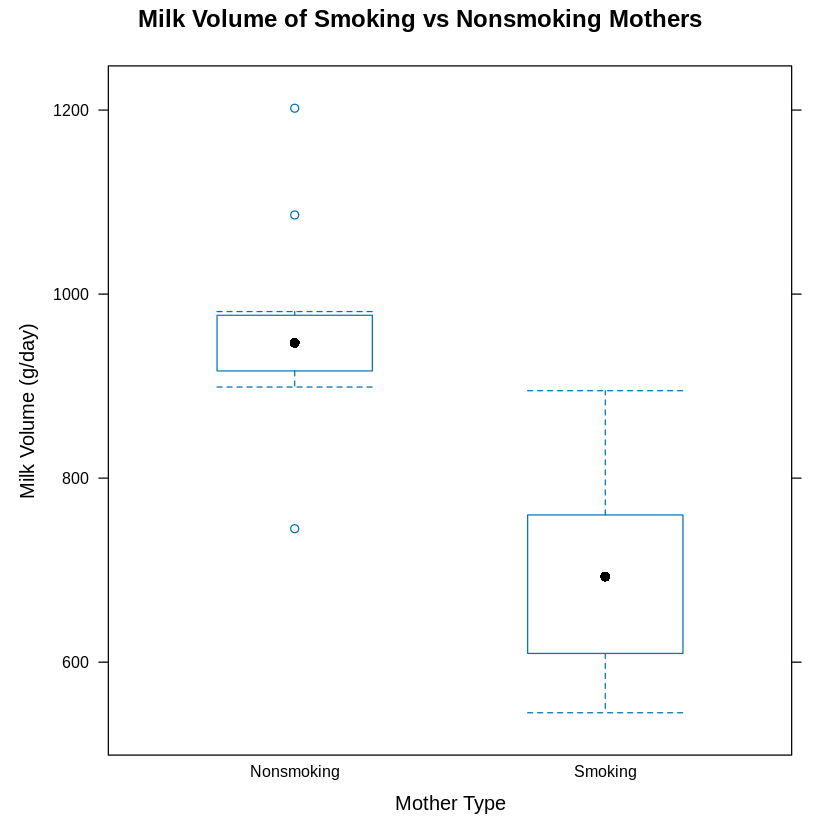

In [19]:
# Smoking and nonsmoking mothers' milk volume data
smoking_mothers <- c(621, 793, 593, 545, 753, 655, 895, 767, 714, 598, 693)
nonsmoking_mothers <- c(947, 945, 1086, 1202, 973, 981, 930, 745, 903, 899, 961)

# Combine the data into a single data frame
mothers_data <- data.frame(
  Milk_Volume = c(smoking_mothers, nonsmoking_mothers),
  Mother_Type = rep(c("Smoking", "Nonsmoking"), each = length(smoking_mothers))
)

# Side by side boxplots
bwplot(Milk_Volume ~ Mother_Type, data = mothers_data,
       xlab = "Mother Type", ylab = "Milk Volume (g/day)", main = "Milk Volume of Smoking vs Nonsmoking Mothers")



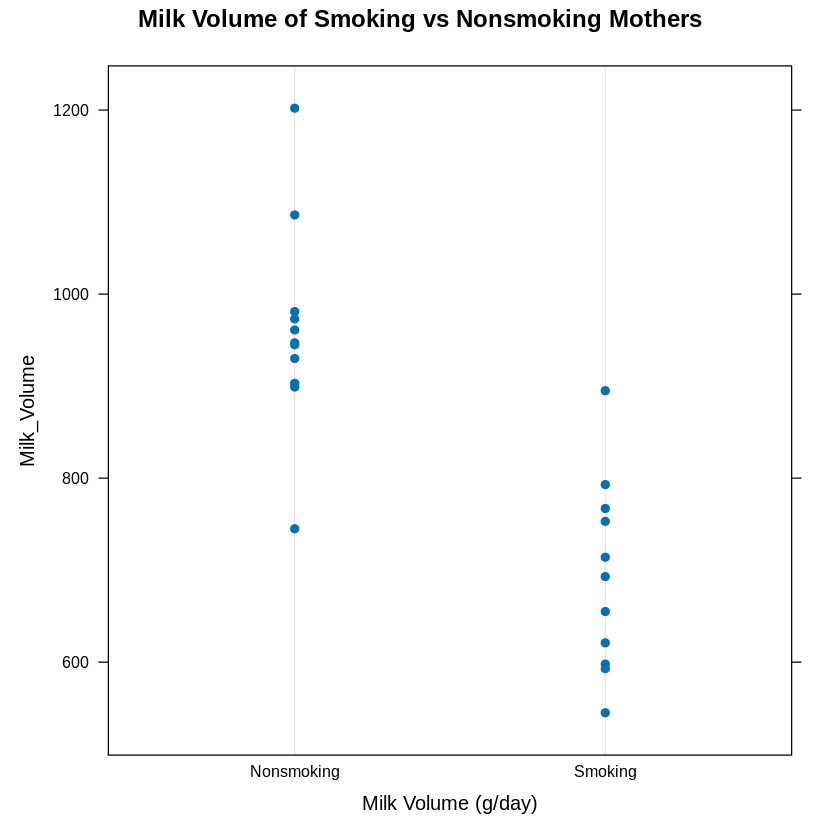

In [20]:
# Dotplot
dotplot(Milk_Volume ~ Mother_Type, data = mothers_data, type = "p", pch = 19,
        main = "Milk Volume of Smoking vs Nonsmoking Mothers", xlab = "Milk Volume (g/day)")

2. For the possum data set, generate the following plots:

a) histograms of hdlngth – use histogram();

b) normal probability plots of hdlngth – use qqmath();

c) density plots of hdlngth – use densityplot(). Investigate the effect of varying the density bandwidth
(bw).


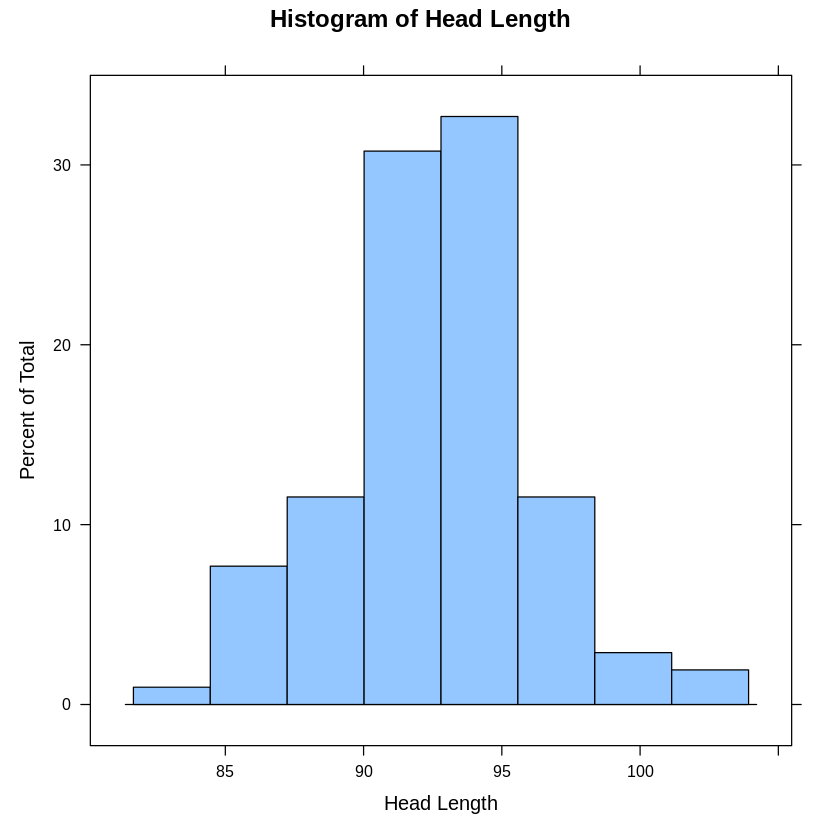

In [21]:
possum <- read.csv("/content/possum.csv")

# Histogram of hdlngth
histogram(~ hdlngth, data = possum, xlab = "Head Length", main = "Histogram of Head Length")

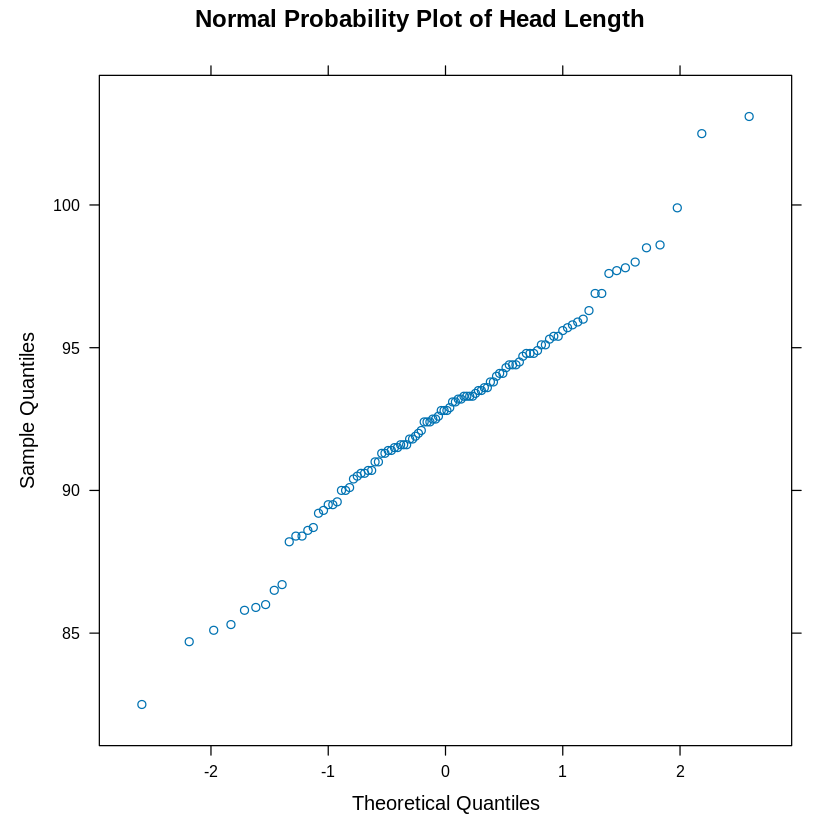

In [22]:
# Normal probability plot of hdlngth
qqmath(~ hdlngth, data = possum, distribution = qnorm,
       xlab = "Theoretical Quantiles", ylab = "Sample Quantiles",
       main = "Normal Probability Plot of Head Length")

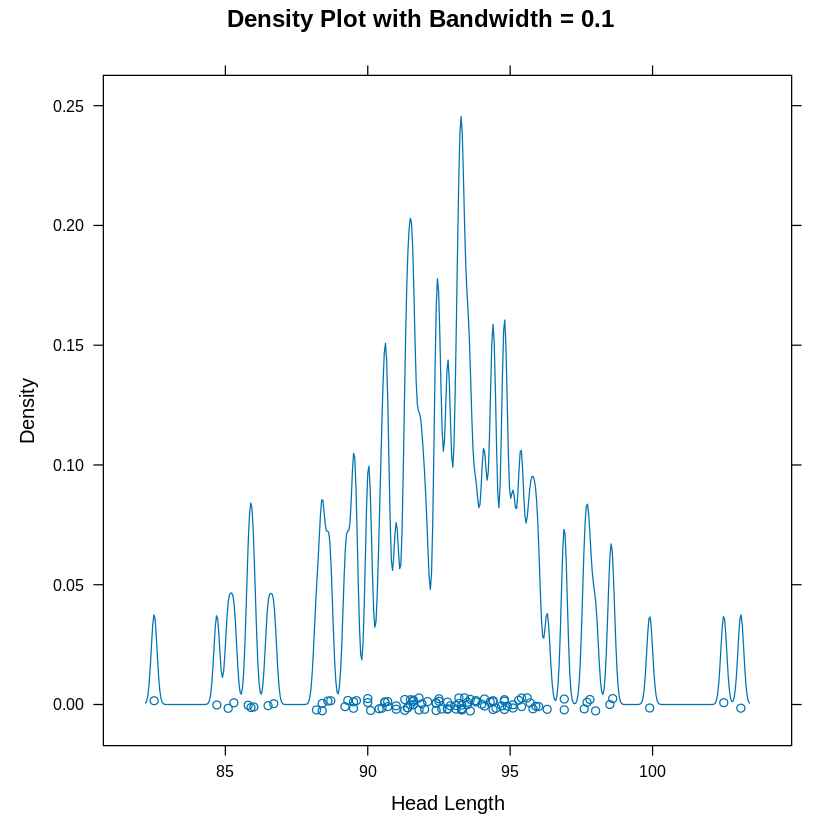

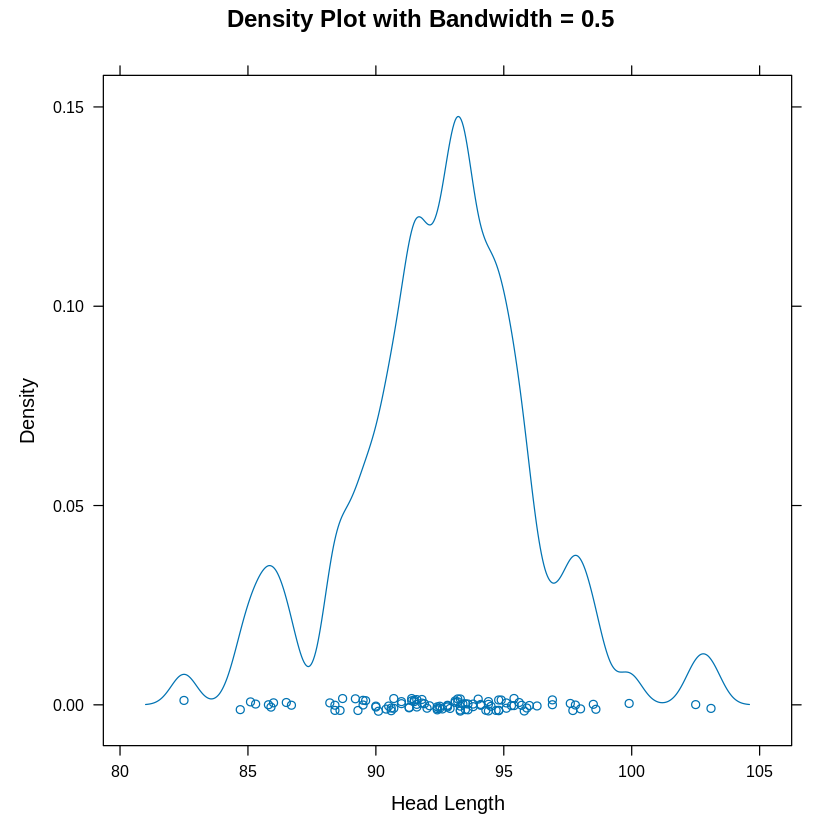

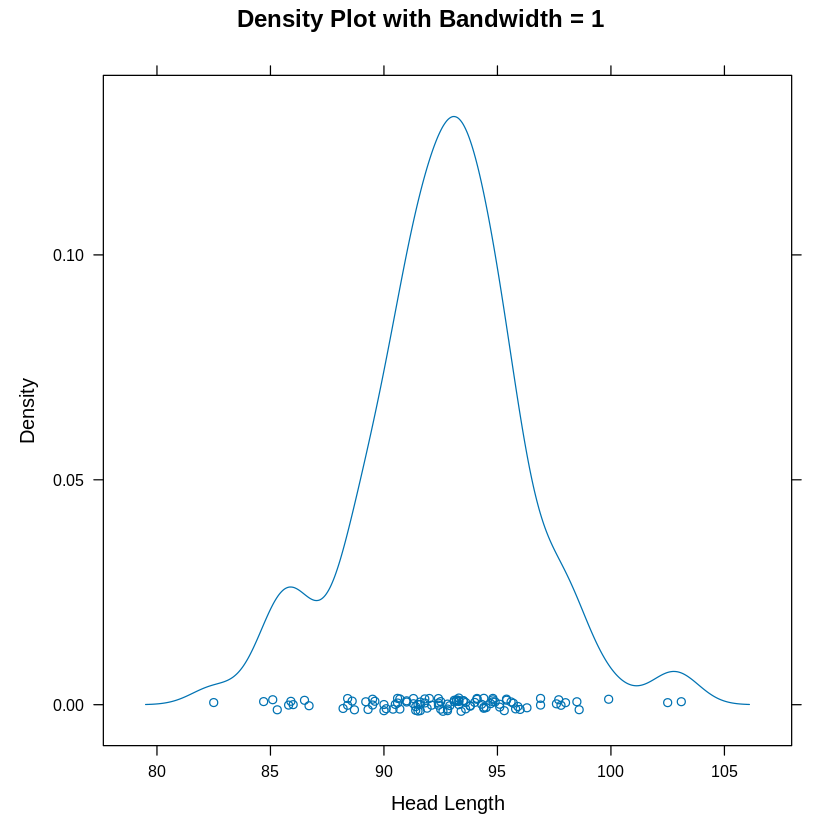

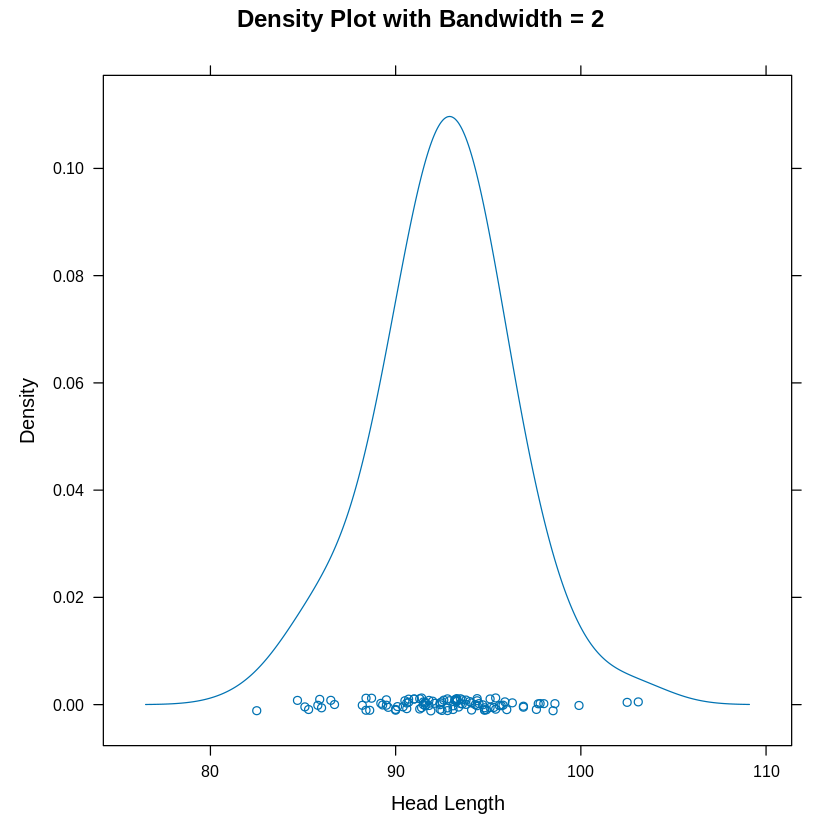

In [25]:
# Density plot of hdlngth with varying bandwidth (bw)
par(mfrow = c(2, 2))  # Set up a 2x2 plotting layout
for (bw in c(0.1, 0.5, 1, 2)) {
  plot <- densityplot(~ hdlngth, data = possum, bw = bw,
                      xlab = "Head Length", main = paste("Density Plot with Bandwidth =", bw))
  print(plot)  # Print each plot explicitly
}


12. The following exercises relate to the data frame possum that accompanies these notes:

(a) Using the xyplot function, explore the relation between hdlngth and totlngth, taking into account sex
and Pop.

(b) Construct a contour plot of chest versus belly and totlngth – use levelplot() or contourplot().

(c) Construct box and whisker plots for hdlngth, using site as a factor.

(d) Use qqmath() to construct normal probability plots for hdlgth, for each separate level of sex and Pop. Is
there evidence that the distribution of hdlgth varies with the level of these other factors

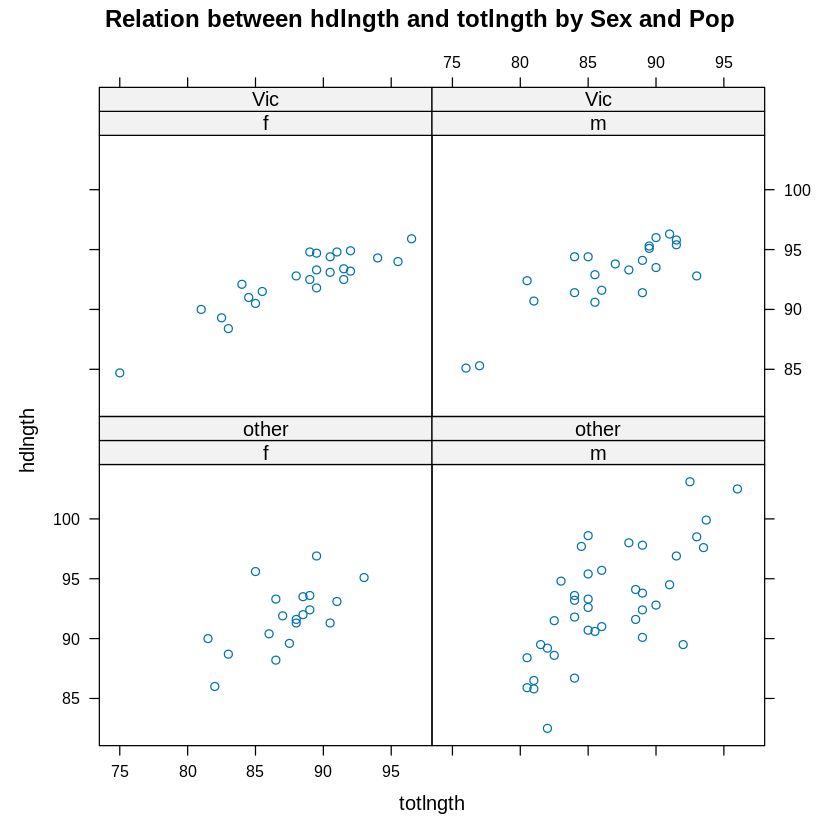

In [26]:
library(lattice)

# (a) Explore the relation between hdlngth and totlngth, taking into account sex and Pop
xyplot(hdlngth ~ totlngth | sex + Pop, data = possum, main = "Relation between hdlngth and totlngth by Sex and Pop")


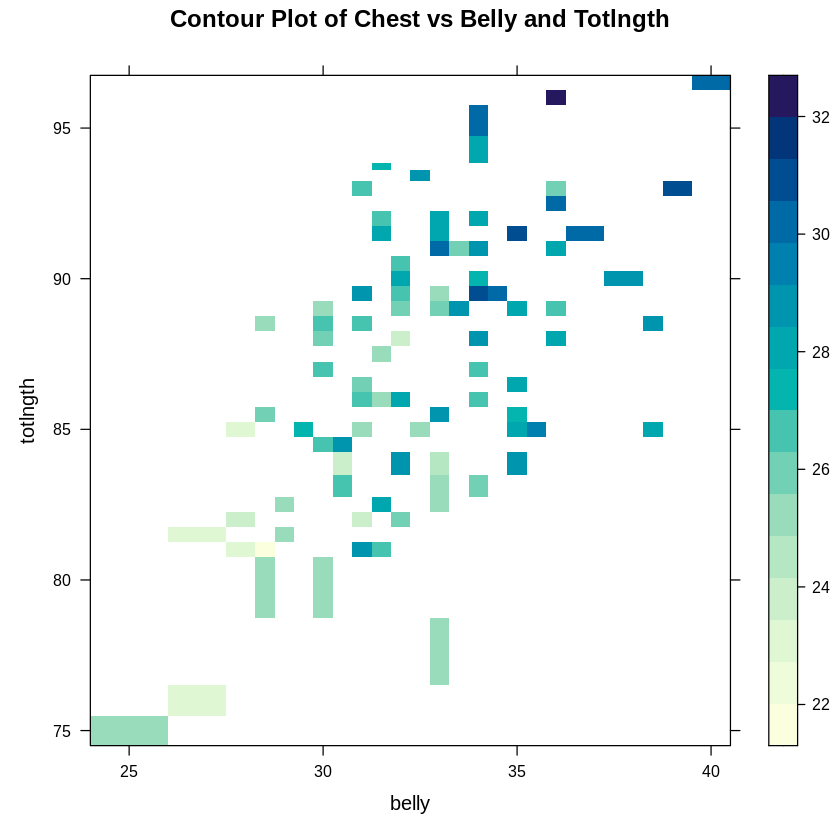

In [27]:

# (b) Construct a contour plot of chest versus belly and totlngth
levelplot(chest ~ belly * totlngth, data = possum, main = "Contour Plot of Chest vs Belly and Totlngth")


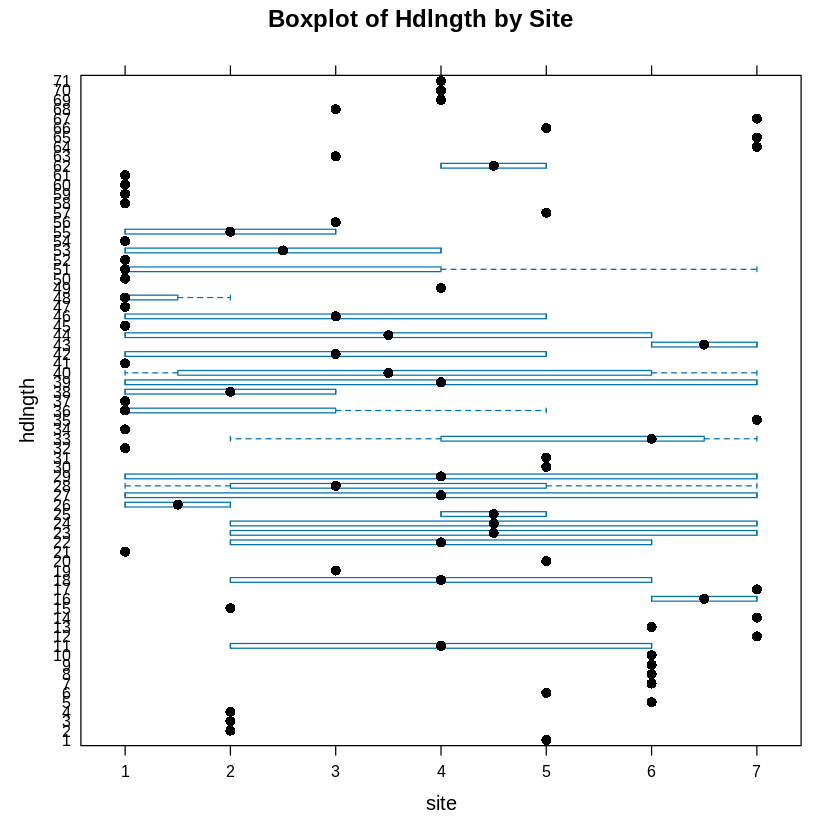

In [28]:
# (c) Construct box and whisker plots for hdlngth, using site as a factor
bwplot(hdlngth ~ site, data = possum, main = "Boxplot of Hdlngth by Site")


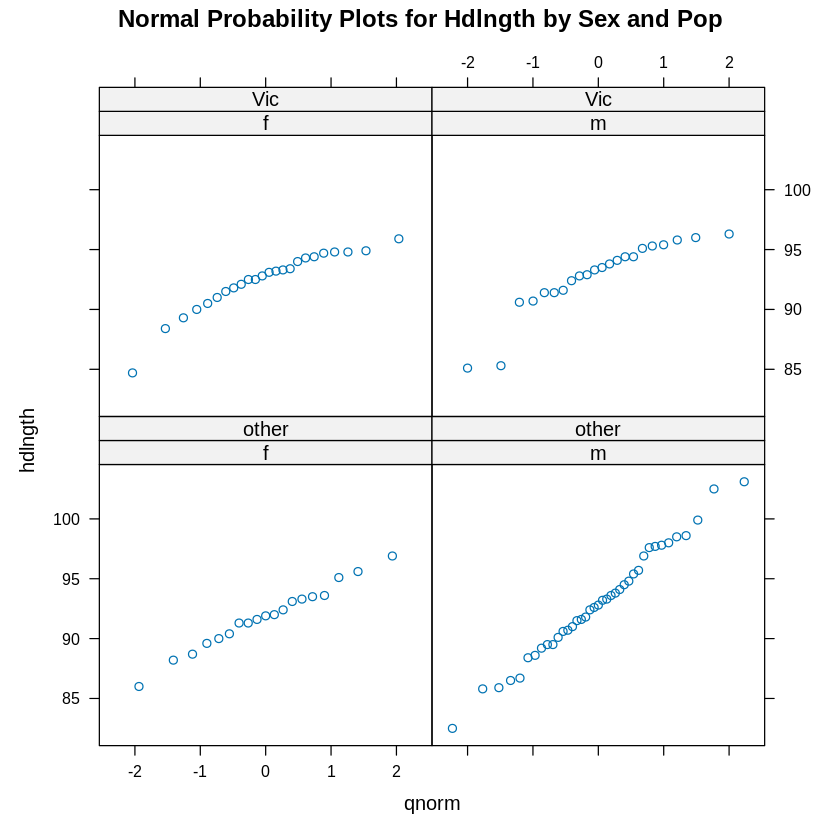

In [29]:
# (d) Use qqmath() to construct normal probability plots for hdlgth, for each separate level of sex and Pop
qqmath(~ hdlngth | sex + Pop, data = possum, main = "Normal Probability Plots for Hdlngth by Sex and Pop")

13. The frame airquality that is in the datasets package has columns Ozone, Solar.R, Wind, Temp, Month
and Day. Plot Ozone against Solar.R for each of three temperature ranges, and each of three wind ranges.

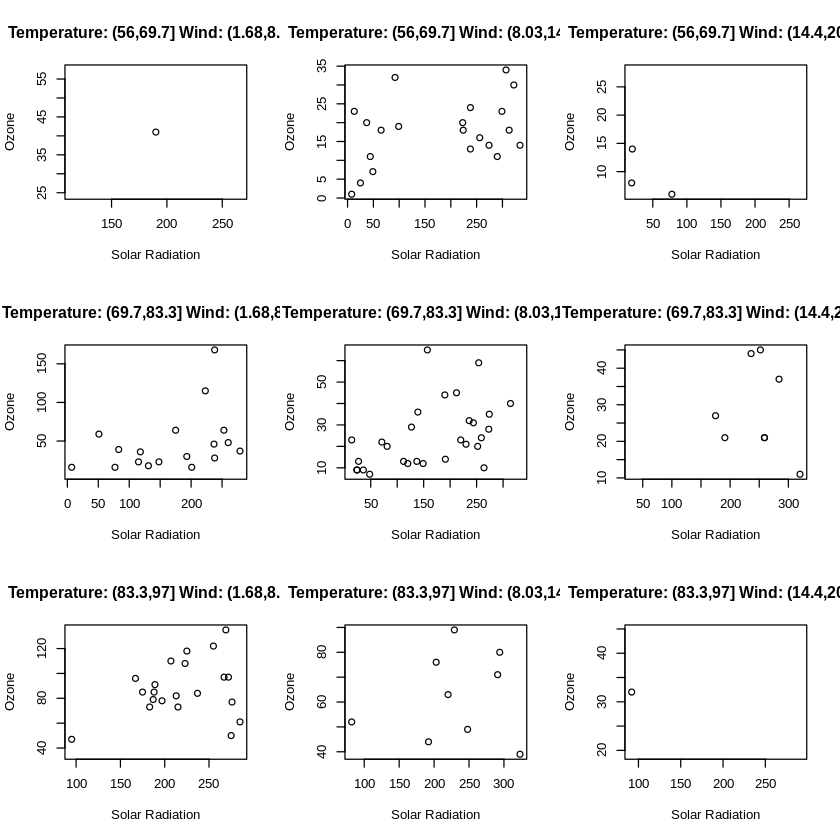

In [30]:
# Load the datasets package
library(datasets)

# Load the airquality dataset
airquality <- read.csv("/content/airquality.csv")

# Define temperature ranges
temp_ranges <- cut(airquality$Temp, breaks = 3)

# Define wind ranges
wind_ranges <- cut(airquality$Wind, breaks = 3)

# Create plots for Ozone against Solar.R for each temperature and wind range
par(mfrow = c(3, 3))  # Set up a 3x3 plotting layout

for (temp in levels(temp_ranges)) {
  for (wind in levels(wind_ranges)) {
    subset_data <- airquality[temp_ranges == temp & wind_ranges == wind, ]
    plot(subset_data$Solar.R, subset_data$Ozone,
         xlab = "Solar Radiation", ylab = "Ozone",
         main = paste("Temperature:", temp, "Wind:", wind))
  }
}
